# スケーリングデータの分析プログラム

In [1]:
#ライブラリのと読み込み
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
from scipy import signal
import japanize_matplotlib

/home/takagi/anaconda3/lib/python3.8/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
#スケーリングデータ(datetime処理済み)のい読み込み
data1_a_label = pd.read_csv('emotion_label/label_datetime/emotion_A_20201111_1_datetime.csv')
data1_b_label = pd.read_csv('emotion_label/label_datetime/emotion_B_20201111_1_datetime.csv')
data1_c_label = pd.read_csv('emotion_label/label_datetime/emotion_C_20201111_1_datetime.csv')
data1_d_label = pd.read_csv('emotion_label/label_datetime/emotion_D_20201111_1_datetime.csv')
data2_a_label = pd.read_csv('emotion_label/label_datetime/emotion_A_20201111_2_datetime.csv')
data2_b_label = pd.read_csv('emotion_label/label_datetime/emotion_B_20201111_2_datetime.csv')
data2_c_label = pd.read_csv('emotion_label/label_datetime/emotion_C_20201111_2_datetime.csv')
data2_d_label = pd.read_csv('emotion_label/label_datetime/emotion_D_20201111_2_datetime.csv')

In [3]:
data1_a_label["timeHMS"] = pd.to_datetime(data1_a_label["timeHMS"])
data1_b_label["timeHMS"] = pd.to_datetime(data1_b_label["timeHMS"])
data1_c_label["timeHMS"] = pd.to_datetime(data1_c_label["timeHMS"])
data1_d_label["timeHMS"] = pd.to_datetime(data1_d_label["timeHMS"])

data1_a_label.set_index("timeHMS", inplace=True)
data1_b_label.set_index("timeHMS", inplace=True)
data1_c_label.set_index("timeHMS", inplace=True)
data1_d_label.set_index("timeHMS", inplace=True)

In [4]:
data2_a_label["timeHMS"] = pd.to_datetime(data2_a_label["timeHMS"])
data2_b_label["timeHMS"] = pd.to_datetime(data2_b_label["timeHMS"])
data2_c_label["timeHMS"] = pd.to_datetime(data2_c_label["timeHMS"])
data2_d_label["timeHMS"] = pd.to_datetime(data2_d_label["timeHMS"])

data2_a_label.set_index("timeHMS", inplace=True)
data2_b_label.set_index("timeHMS", inplace=True)
data2_c_label.set_index("timeHMS", inplace=True)
data2_d_label.set_index("timeHMS", inplace=True)

In [6]:
data1_c_label

,emotion_level,subject
timeHMS,,
2020-11-11 12:40:06,3,A
2020-11-11 12:40:38,3,B
2020-11-11 12:40:44,3,A
2020-11-11 12:40:55,2,B
2020-11-11 12:41:05,3,D
2020-11-11 12:41:15,3,A
2020-11-11 12:41:28,4,B
2020-11-11 12:42:40,3,D
2020-11-11 12:43:00,2,B


In [14]:
user_id = ["A", "B", "C", "D"]

NameError: name 'ax1' is not defined

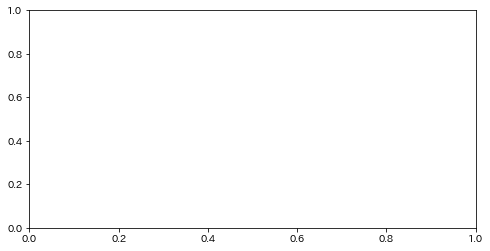

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax1.bar(user_id[0], data1_c_label["emotion_level"][0], align="center")
# ax.plot(data1_c_label["emotion_level"])
ax1.axvspan("2020-11-11 12:40:06", "2020-11-11 12:40:44", color="gray", alpha=0.3)
# ax.grid()
labels = ax.get_xticklabels()
plt.setp(labels, rotation=15, fontsize=12);

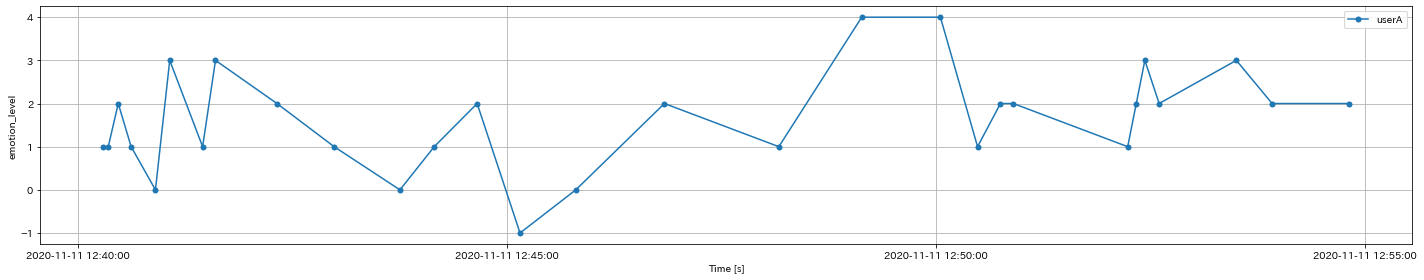

In [17]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(data1_a_label["emotion_level"], marker="o", markeredgewidth=0, label="userA")
# ax.plot(data1_b_label["emotion_level"], marker="o", markeredgewidth=0, label="userB")
# ax.plot(data1_c_label["emotion_level"], marker="o", markeredgewidth=0, label="userC")
# ax.plot(data1_d_label["emotion_level"], marker="o", markeredgewidth=0, label="userD")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
plt.xticks(rotation=0)
# plt.xlim(datetime.datetime(2018,8,22,11,6,0), datetime.datetime(2018,8,22,11,6,9))
plt.xlabel("Time [s]")
plt.ylabel("emotion_level")
plt.legend()
plt.tight_layout()
plt.grid(True)

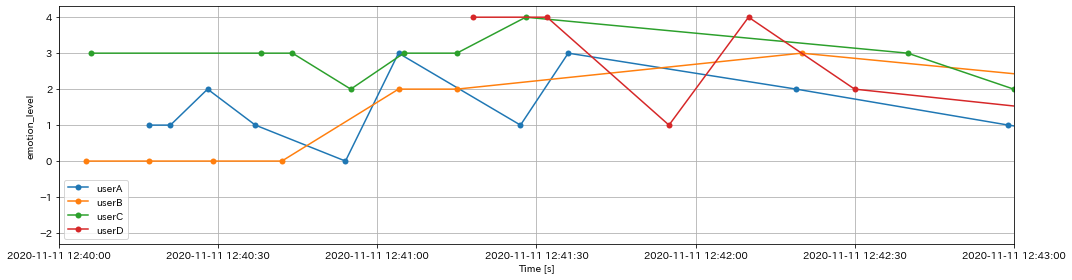

In [80]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data1_a_label["emotion_level"], marker="o", markeredgewidth=0, label="userA")
ax.plot(data1_b_label["emotion_level"], marker="o", markeredgewidth=0, label="userB")
ax.plot(data1_c_label["emotion_level"], marker="o", markeredgewidth=0, label="userC")
ax.plot(data1_d_label["emotion_level"], marker="o", markeredgewidth=0, label="userD")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
plt.xticks(rotation=0)
plt.xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,43,0))
plt.xlabel("Time [s]")
plt.ylabel("emotion_level")
plt.legend()
plt.tight_layout()
plt.grid(True)

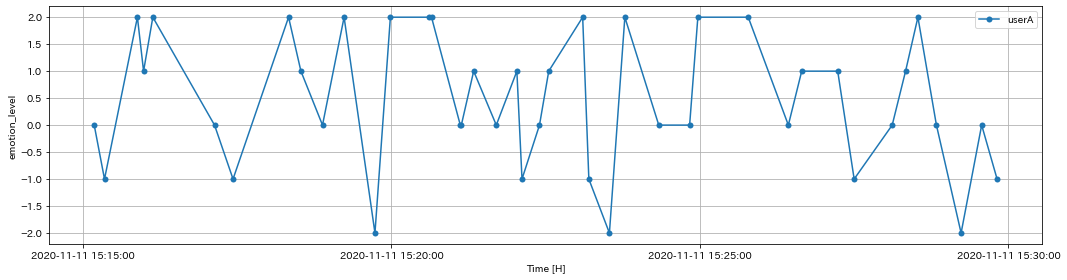

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data2_a_label["emotion_level"], marker="o", markeredgewidth=0, label="userA")
# ax.plot(data2_b_label["emotion_level"], marker="o", markeredgewidth=0, label="userB")
# ax.plot(data2_c_label["emotion_level"], marker="o", markeredgewidth=0, label="userC")
# ax.plot(data2_d_label["emotion_level"], marker="o", markeredgewidth=0, label="userD")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
plt.xticks(rotation=0)
# plt.xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,43,0))
plt.xlabel("Time [H]")
plt.ylabel("emotion_level")
plt.legend()
plt.tight_layout()
plt.grid(True)

In [6]:
#emotion_levelの各数値の個数をリスト化
data1_a_label_list = []
for i in range(-4, 5, 1):
    a = len(data1_a_label[data1_a_label.emotion_level==i])
    data1_a_label_list.append(a)

data1_b_label_list = []
for i in range(-4, 5, 1):
    a = len(data1_b_label[data1_b_label.emotion_level==i])
    data1_b_label_list.append(a)

data1_c_label_list = []
for i in range(-4, 5, 1):
    a = len(data1_c_label[data1_c_label.emotion_level==i])
    data1_c_label_list.append(a)

data1_d_label_list = []
for i in range(-4, 5, 1):
    a = len(data1_d_label[data1_d_label.emotion_level==i])
    data1_d_label_list.append(a)

data2_a_label_list = []
for i in range(-4, 5, 1):
    a = len(data2_a_label[data2_a_label.emotion_level==i])
    data2_a_label_list.append(a)

data2_b_label_list = []
for i in range(-4, 5, 1):
    a = len(data2_b_label[data2_b_label.emotion_level==i])
    data2_b_label_list.append(a)

data2_c_label_list = []
for i in range(-4, 5, 1):
    a = len(data2_c_label[data2_c_label.emotion_level==i])
    data2_c_label_list.append(a)

data2_d_label_list = []
for i in range(-4, 5, 1):
    a = len(data2_d_label[data2_d_label.emotion_level==i])
    data2_d_label_list.append(a)

In [7]:
#emotion_levelの定義
emotion_level = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# 棒グラフ化

In [10]:
data1_a_label_list

[0, 0, 0, 1, 3, 9, 10, 4, 2]

In [12]:
data2_a_label_list

[0, 0, 3, 6, 13, 8, 12, 0, 0]

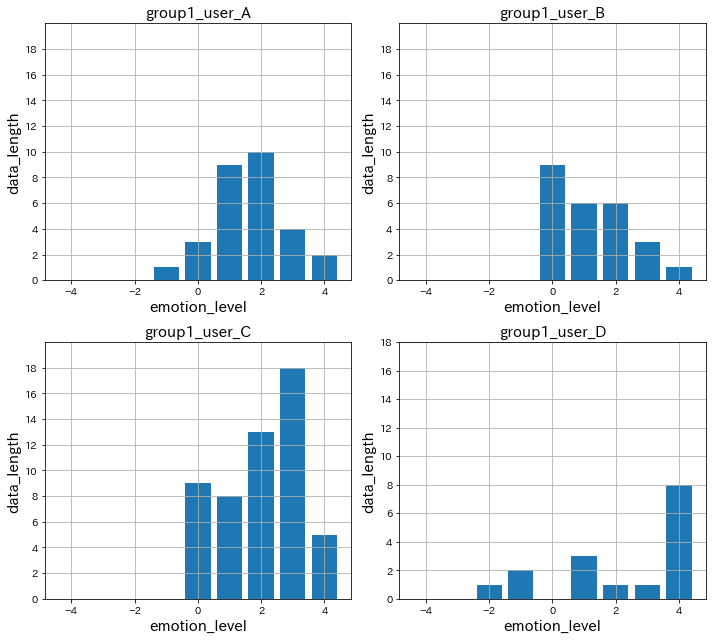

In [8]:
fig = plt.figure(figsize=(10, 9))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

center = np.array(emotion_level)
height1 = np.array(data1_a_label_list)
height2 = np.array(data1_b_label_list)
height3 = np.array(data1_c_label_list)
height4 = np.array(data1_d_label_list)

ax1.bar(center, height1, align="center")
ax2.bar(center, height2, align="center")
ax3.bar(center, height3, align="center")
ax4.bar(center, height4, align="center")

ax1.set_title("group1_user_A", fontsize=15)
ax2.set_title("group1_user_B", fontsize=15)
ax3.set_title("group1_user_C", fontsize=15)
ax4.set_title("group1_user_D", fontsize=15)


ax1.set_ylabel("data_length", fontsize=15)
ax1.set_xlabel("emotion_level", fontsize=15)

ax2.set_ylabel("data_length", fontsize=15)
ax2.set_xlabel("emotion_level", fontsize=15)

ax3.set_ylabel("data_length", fontsize=15)
ax3.set_xlabel("emotion_level", fontsize=15)

ax4.set_ylabel("data_length", fontsize=15)
ax4.set_xlabel("emotion_level", fontsize=15)

ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
ax3.set_ylim([0, 20])
ax3.set_ylim([0, 20])

ax1.set_yticks(np.arange(0, 20, 2))
ax2.set_yticks(np.arange(0, 20, 2))
ax3.set_yticks(np.arange(0, 20, 2))
ax4.set_yticks(np.arange(0, 20, 2))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.tight_layout()
plt.show()

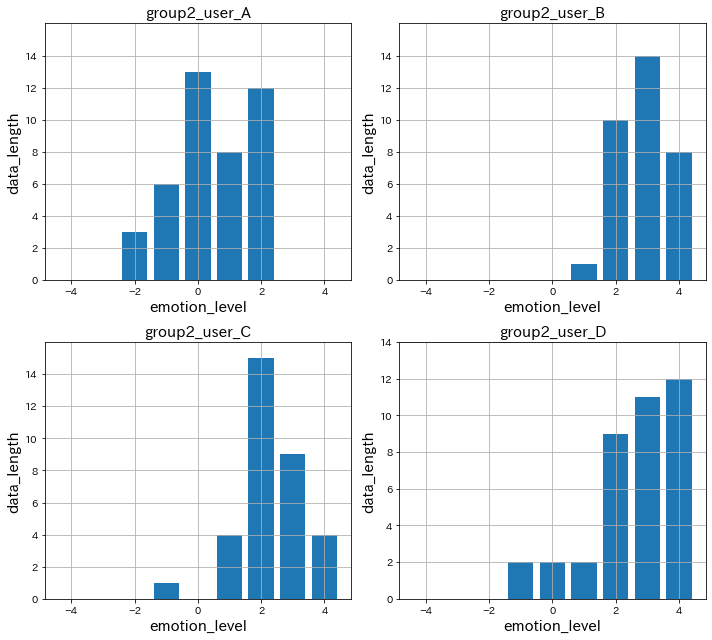

In [9]:
fig = plt.figure(figsize=(10, 9))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

center = np.array(emotion_level)
height1 = np.array(data2_a_label_list)
height2 = np.array(data2_b_label_list)
height3 = np.array(data2_c_label_list)
height4 = np.array(data2_d_label_list)


ax1.bar(center, height1, align="center")
ax2.bar(center, height2, align="center")
ax3.bar(center, height3, align="center")
ax4.bar(center, height4, align="center")

ax1.set_title("group2_user_A", fontsize=15)
ax2.set_title("group2_user_B", fontsize=15)
ax3.set_title("group2_user_C", fontsize=15)
ax4.set_title("group2_user_D", fontsize=15)


ax1.set_ylabel("data_length", fontsize=15)
ax1.set_xlabel("emotion_level", fontsize=15)

ax2.set_ylabel("data_length", fontsize=15)
ax2.set_xlabel("emotion_level", fontsize=15)

ax3.set_ylabel("data_length", fontsize=15)
ax3.set_xlabel("emotion_level", fontsize=15)

ax4.set_ylabel("data_length", fontsize=15)
ax4.set_xlabel("emotion_level", fontsize=15)

ax1.set_ylim([0, 16])
ax2.set_ylim([0, 16])
ax3.set_ylim([0, 16])
ax3.set_ylim([0, 16])

ax1.set_yticks(np.arange(0, 16, 2))
ax2.set_yticks(np.arange(0, 16, 2))
ax3.set_yticks(np.arange(0, 16, 2))
ax4.set_yticks(np.arange(0, 16, 2))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.tight_layout()
plt.show()

In [9]:
#角参加者が発話と認めた数
user = ["A", "B", "C", "D"]
data1_a_speak_list = []

for i in user:
    a = len(data1_a_label[data1_a_label.subject==i])
    data1_a_speak_list.append(a)

data1_b_speak_list = []
for i in user:
    a = len(data1_b_label[data1_b_label.subject==i])
    data1_b_speak_list.append(a)
    
data1_c_speak_list = []
for i in user:
    a = len(data1_c_label[data1_c_label.subject==i])
    data1_c_speak_list.append(a)

data1_d_speak_list = []
for i in user:
    a = len(data1_d_label[data1_d_label.subject==i])
    data1_d_speak_list.append(a)

data2_a_speak_list = []
for i in user:
    a = len(data2_a_label[data2_a_label.subject==i])
    data2_a_speak_list.append(a)

data2_b_speak_list = []
for i in user:
    a = len(data2_b_label[data2_b_label.subject==i])
    data2_b_speak_list.append(a)
    
data2_c_speak_list = []
for i in user:
    a = len(data2_c_label[data2_c_label.subject==i])
    data2_c_speak_list.append(a)

data2_d_speak_list = []
for i in user:
    a = len(data2_d_label[data2_d_label.subject==i])
    data2_d_speak_list.append(a)

In [10]:
print(data1_a_speak_list)
print(data1_b_speak_list)
print(data1_c_speak_list)
print(data1_d_speak_list)

print(data2_a_speak_list)
print(data2_b_speak_list)
print(data2_c_speak_list)
print(data2_d_speak_list)

[0, 16, 9, 4]
[11, 0, 10, 4]
[21, 25, 0, 7]
[6, 5, 5, 0]
[0, 18, 13, 11]
[11, 0, 11, 11]
[9, 15, 0, 9]
[10, 18, 10, 0]


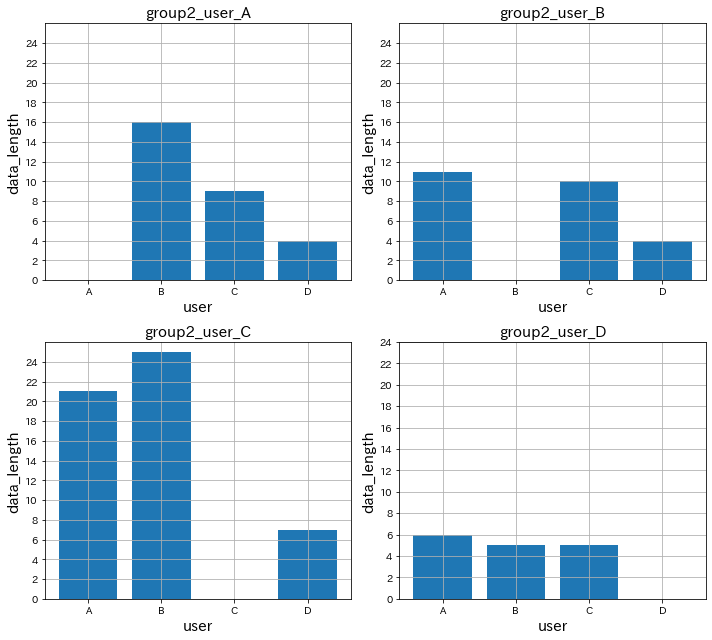

In [19]:
user = ["A", "B", "C", "D"]
fig = plt.figure(figsize=(10, 9))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

center = np.array(user)
height1 = np.array(data1_a_speak_list)
height2 = np.array(data1_b_speak_list)
height3 = np.array(data1_c_speak_list)
height4 = np.array(data1_d_speak_list)


ax1.bar(center, height1, align="center")
ax2.bar(center, height2, align="center")
ax3.bar(center, height3, align="center")
ax4.bar(center, height4, align="center")

ax1.set_title("group2_user_A", fontsize=15)
ax2.set_title("group2_user_B", fontsize=15)
ax3.set_title("group2_user_C", fontsize=15)
ax4.set_title("group2_user_D", fontsize=15)


ax1.set_ylabel("data_length", fontsize=15)
ax1.set_xlabel("user", fontsize=15)

ax2.set_ylabel("data_length", fontsize=15)
ax2.set_xlabel("user", fontsize=15)

ax3.set_ylabel("data_length", fontsize=15)
ax3.set_xlabel("user", fontsize=15)

ax4.set_ylabel("data_length", fontsize=15)
ax4.set_xlabel("user", fontsize=15)

ax1.set_ylim([0, 26])
ax2.set_ylim([0, 26])
ax3.set_ylim([0, 26])
ax3.set_ylim([0, 26])

ax1.set_yticks(np.arange(0, 26, 2))
ax2.set_yticks(np.arange(0, 26, 2))
ax3.set_yticks(np.arange(0, 26, 2))
ax4.set_yticks(np.arange(0, 26, 2))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.tight_layout()
plt.show()

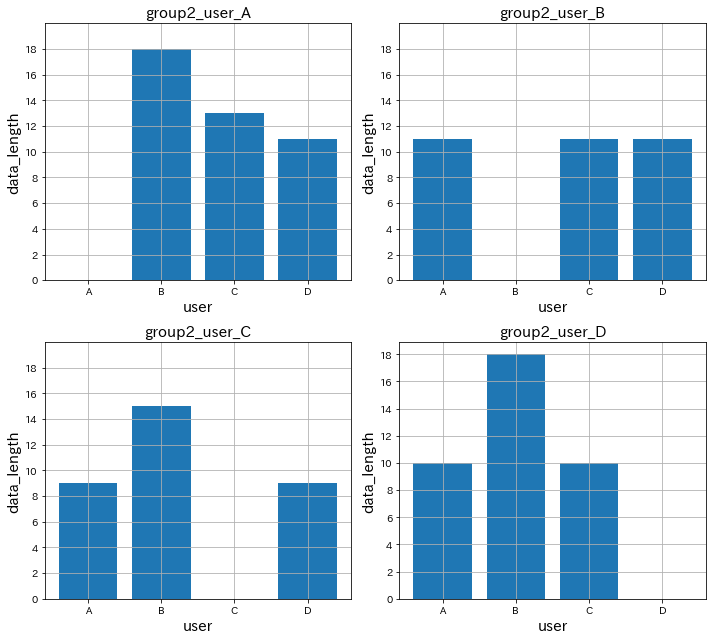

In [17]:
user = ["A", "B", "C", "D"]
fig = plt.figure(figsize=(10, 9))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

center = np.array(user)
height1 = np.array(data2_a_speak_list)
height2 = np.array(data2_b_speak_list)
height3 = np.array(data2_c_speak_list)
height4 = np.array(data2_d_speak_list)


ax1.bar(center, height1, align="center")
ax2.bar(center, height2, align="center")
ax3.bar(center, height3, align="center")
ax4.bar(center, height4, align="center")

ax1.set_title("group2_user_A", fontsize=15)
ax2.set_title("group2_user_B", fontsize=15)
ax3.set_title("group2_user_C", fontsize=15)
ax4.set_title("group2_user_D", fontsize=15)


ax1.set_ylabel("data_length", fontsize=15)
ax1.set_xlabel("user", fontsize=15)

ax2.set_ylabel("data_length", fontsize=15)
ax2.set_xlabel("user", fontsize=15)

ax3.set_ylabel("data_length", fontsize=15)
ax3.set_xlabel("user", fontsize=15)

ax4.set_ylabel("data_length", fontsize=15)
ax4.set_xlabel("user", fontsize=15)

ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
ax3.set_ylim([0, 20])
ax3.set_ylim([0, 20])

ax1.set_yticks(np.arange(0, 20, 2))
ax2.set_yticks(np.arange(0, 20, 2))
ax3.set_yticks(np.arange(0, 20, 2))
ax4.set_yticks(np.arange(0, 20, 2))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.tight_layout()
plt.show()

In [24]:
plt.plot(data1_a_label[emotion_level])

KeyError: "None of [Int64Index([-4, -3, -2, -1, 0, 1, 2, 3, 4], dtype='int64')] are in the [columns]"

In [3]:
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.figure_factory as ff 


df = pd.DataFrame([
    dict(Task="Mac mini(Intel,2020)", Start='2020-09-01', Finish='2023-9-30', Resource="Mac mini"),
    dict(Task="MacBook Air(M1,2020)", Start='2020-12-01', Finish='2021-12-31', Resource="MacBook"),
    dict(Task="MacBook Pro(M2,2021)", Start='2021-12-01', Finish='2024-12-31', Resource="MacBook"),
    dict(Task="Mac mini(M?,2023)", Start='2023-09-01', Finish='2026-09-30', Resource="Mac mini")
])

colors = {'Mac mini': 'rgb(30, 144, 255)',
          'MacBook': 'rgb(50,205,50)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True,
                      group_tasks=True)
fig.show()

AttributeError: module 'plotly.figure_factory' has no attribute 'create_gantt'

In [27]:
df

,Task,Start,Finish,Resource
0,"Mac mini(Intel,2020)",2020-09-01,2023-9-30,Mac mini
1,"MacBook Air(M1,2020)",2020-12-01,2021-12-31,MacBook
2,"MacBook Pro(M2,2021)",2021-12-01,2024-12-31,MacBook
3,"Mac mini(M?,2023)",2023-09-01,2026-09-30,Mac mini


In [4]:
import plotly.figure_factory as ff

df = [dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
      dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
      dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')]

fig = ff.create_gantt(df)
iplot(fig)


AttributeError: module 'plotly.figure_factory' has no attribute 'create_gantt'

In [5]:
import plotly.express as px
import plotly.io as pio

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
pio.write_html(fig,file="./6-1.html")

In [6]:
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])

In [7]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
pio.write_html(fig,file="./6-1.html")

AttributeError: module 'plotly.express' has no attribute 'timeline'